# UCB : Upper Confidence Bound

$$ UCB1_{kt} = \bar{\pi}_{kt} + \sqrt{\alpha \log t \over n_{kt} } $$

with, for example, $\alpha = 2$

prices exist in a set $p_1, p_2, ..., p_k$


In [5]:
import numpy as np
from typing import List, Union

def ucb1(π : float, n : int, t : int, α=2):
    return π + np.sqrt( (α*np.log(t)) / n )

def simulation(p: list, π, fT, profitF, α=2):
    """
    
    p : possible prices
    fT : final time period
    """
    p_max_l = np.empty(fT)
    profits = np.empty(fT)
    n = np.ones_like(p)
    for t in range(fT):
        ucbs = ucb1(π, n, t+1, α)
        b_arm = np.argmax(ucbs)
        p_max_l[t] = p[b_arm]
        profits[t] = profitF(p_max_l[t])
        
        # Update: only chosen arm changes these
        π[b_arm] = (n[b_arm]/(n[b_arm]+1))*π[b_arm] + (1/(n[b_arm]+1))*profits[t] 
        n[b_arm] += 1
       
    return {'profits' : profits, 'prices' : p_max_l, 'last_π' : π, 'last_n' : n}
    

## Example

optimal price is:  3.5
optimal profit is:  13.25
Last price:  4.0
Last profit:  13.0326227029


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


Text(0.5,1,'Cumulative Regret')

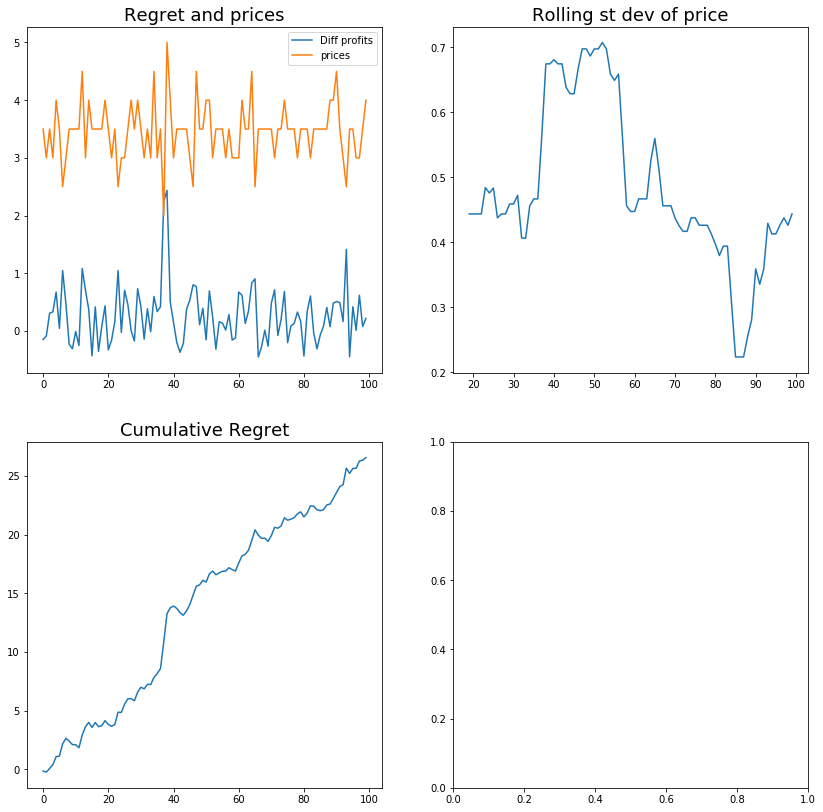

In [232]:
from sympy import symbols, solve
import numpy as np

def profit(p: float):
    return -(p-3)**2 + 10 + p
    
def rand_profit(p: float, var_par=1):
    if (type(p) == float) or (type(p) == np.float64):
        ɛ = var_par*(np.random.rand()-0.5)
    else:
        ɛ = var_par*(np.random.rand(len(p))-0.5)
    return profit(p) + ɛ

pr = symbols('p')

profit_s = -(pr-3)**2 + 10 + pr
opt_price = float(solve(profit_s.diff(pr), pr)[0])
print("optimal price is: ", opt_price)
print("optimal profit is: ", profit(opt_price))

#p_list = np.linspace(0, 8, 15)
p_list = np.array([0.1, 1.5, 2, 2.5, 3., 3.5, 4., 4.5, 5.])

def generate_inital_π(p, var_par=10):
    """
    This will be the prior!
    For now: sample each arm once
    """
    return rand_profit(p, var_par)
    
#inital_π = 0*np.ones_like(p_list) + 2*(np.random.rand(len(p_list))-0.5)
inital_π = generate_inital_π(p_list, var_par=1)

fT = 100

def super_simple_profits(p, j=8):
    profits = p.empty_like(p)
    profits[j] = 5
    return profits

d = simulation(p_list, inital_π, fT, rand_profit)

print("Last price: ", d['prices'][-1])
print("Last profit: ", d['profits'][-1])

def diff_profits(simul_profits, optimal=profit(opt_price)):
    """
    Returns a vector with diff profits over t
    """
    optimal = np.repeat(optimal, len(simul_profits))
    return optimal - simul_profits

def regret(simul_profits, optimal=profit(opt_price)):
    """
    Difference of cumulative profits
    """
    #optimal = rand_profit(opt_price)
    optimal = np.repeat(optimal, len(simul_profits))
    return np.cumsum(optimal) - np.cumsum(simul_profits)


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes[0, 0].plot(diff_profits(d['profits']), label="Diff profits")

axes[0, 0].plot(d['prices'], label="prices")
axes[0, 0].legend()
axes[0, 0].set_title("Regret and prices", size=18)

import pandas as pd

axes[0, 1].plot(pd.rolling_std(d['prices'], window=20), label="Rolling St Dev of price")
axes[0, 1].set_title("Rolling st dev of price", size=18)

axes[1, 0].plot(regret(d['profits']))
axes[1, 0].set_title("Cumulative Regret", size=18)






In [233]:
d

{'last_n': array([  1.,   1.,   2.,   6.,  24.,  53.,  14.,   6.,   2.]),
 'last_π': array([  1.72940151,   9.58691245,  11.09890914,  12.23156187,
         13.00135858,  13.22513734,  12.81851111,  12.39744874,  10.99241845]),
 'prices': array([ 3.5,  3. ,  3.5,  3. ,  4. ,  3.5,  2.5,  3. ,  3.5,  3.5,  3.5,
         3.5,  4.5,  3. ,  4. ,  3.5,  3.5,  3.5,  3.5,  4. ,  3.5,  3. ,
         3.5,  2.5,  3. ,  3. ,  3.5,  4. ,  3.5,  4. ,  3.5,  3. ,  3.5,
         3. ,  4.5,  3. ,  3.5,  2. ,  5. ,  4. ,  3. ,  3.5,  3.5,  3.5,
         3.5,  3. ,  2.5,  4.5,  3.5,  3.5,  4. ,  4. ,  3. ,  3.5,  3.5,
         3.5,  3. ,  3.5,  3. ,  3. ,  3. ,  4. ,  3.5,  3.5,  4.5,  2.5,
         3.5,  3.5,  3.5,  3.5,  3.5,  3. ,  3.5,  3.5,  4. ,  3.5,  3.5,
         3.5,  3. ,  3.5,  3.5,  3.5,  3. ,  3.5,  3.5,  3.5,  3.5,  3.5,
         4. ,  4. ,  4.5,  3.5,  3. ,  2.5,  3.5,  3.5,  3. ,  3. ,  3.5,
         4. ]),
 'profits': array([ 13.39821915,  13.33503606,  12.94386426,  12.91807295,
     

In [202]:
optimal = np.repeat(profit(opt_price), len(d['profits']))
np.cumsum(optimal) - np.cumsum(d['profits'])

array([  0.2167063 ,   0.25267539,   0.26010702,   1.09512485,
         1.50208086,   1.63317479,   2.66795482,   2.7039239 ,
         2.71135553,   2.92806183,   3.47770511,   3.60879905,
         3.64476813,   3.65219976,   4.05915577,   4.27586207,
         4.31183115,   4.31926278,   4.45035672,   5.28537455,
         5.50208086,   6.05172414,   6.05915577,   6.09512485,
         6.22621879,   6.63317479,   6.64060642,   6.67657551,
         8.34869203,   9.38347206,  10.79875149,  11.01545779,
        11.14655172,  11.15398335,  11.18995244,  11.19738407,
        11.60434007,  12.15398335,  12.37068966,  12.50178359,
        12.53775268,  12.5451843 ,  12.58115339,  13.41617122,
        13.54726516,  13.76397146,  13.77140309,  13.80737218,
        14.21432818,  14.22175981,  14.35285375,  14.38882283,
        14.60552913,  15.15517241,  15.16260404,  15.19857313,
        15.32966706,  15.33709869,  15.55380499,  15.58977408,
        16.6245541 ,  17.03151011,  17.03894174,  17.17

# Bayesian UBC

In [49]:
%debug

> <ipython-input-46-d43a6221b8ff>(5)ucb1()
      3 
      4 def ucb1(π : float, n : int, t : int, α=2):
----> 5     return π + sqrt( (α*log(t)) / n )
      6 
      7 def best_price(p: List[float], n: List[int], π_current: List[float], t : int):

0.0
0.0
0.0
0.0


In [196]:
t, n = 100, 8
np.sqrt(2*np.log(t) / n )

1.0729830131446736

In [190]:
d

{'last_n': array([   1.,    1.,    1.,    1.,    1.,    1.,    2.,    2.,    4.,
           9.,   26.,   89.,  291.,  386.,  141.,   40.,   14.,    5.,
           3.,    2.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.]),
 'last_π': array([  1.4631494 ,   2.85470973,   4.19944802,   5.87796728,
          7.26557192,   8.88273422,  10.01989935,  10.75789142,
         11.54511533,  12.16678535,  12.70018376,  13.03678818,
         13.21510157,  13.243563  ,  13.11903508,  12.84080617,
         12.40442516,  11.75857013,  11.19435539,  10.24410477,
          9.14224492,   8.02925832,   6.69263057,   4.93805031,
          3.58437656,   2.002687  ,   0.21490484,  -2.44213254,
         -4.26274885,  -7.11791547]),
 'prices': array([ 3.5862069 ,  3.31034483,  3.03448276,  3.86206897,  3.5862069 ,
         3.31034483,  4.13793103,  2.75862069,  3.03448276,  3.86206897,
         3.5862069 ,  3.31034483,  4.4137931 ,  3.5862069 ,  3.03448276,
         3.86206897, 

# Algo de Keskin?